In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import os

In [19]:
#importation de la base de données
df = pd.read_csv("C:/Users/Gaston TCHEGO/Desktop/tests/powerconsumption.csv")
df.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [16]:
# les differentes variables
df.columns

Index(['Datetime', 'Temperature', 'Humidity', 'WindSpeed',
       'GeneralDiffuseFlows', 'DiffuseFlows', 'PowerConsumption_Zone1',
       'PowerConsumption_Zone2', 'PowerConsumption_Zone3'],
      dtype='object')

In [20]:
# Convertir la colonne en datetime
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Séparer en deux colonnes : date et heure
df['Date'] = df['Datetime'].dt.date
df['Heure'] = df['Datetime'].dt.time
# Réorganisation des colonnes : Date, Heure, puis le reste
cols = ['Date', 'Heure'] + [col for col in df.columns if col not in ['Date', 'Heure']]
df = df[cols]
#df.pop("Datetime")


In [21]:
# affichage des premieres lignes apres reorganisation
df.head()

,Date,Heure,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,2017-01-01,00:00:00,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01,00:10:00,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01,00:20:00,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01,00:30:00,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01,00:40:00,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [22]:
# Detection des valeurs manquantes
df.isna().sum()

Date                      0
Heure                     0
Datetime                  0
Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64

In [23]:
# Detection de doublon
df.duplicated().sum()

0

In [11]:
#Resumé du jeu de données
df.describe()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


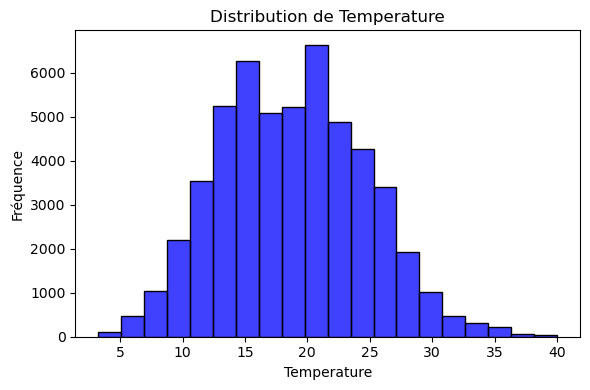

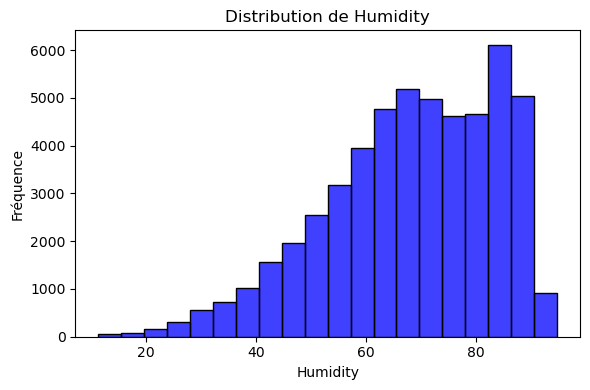

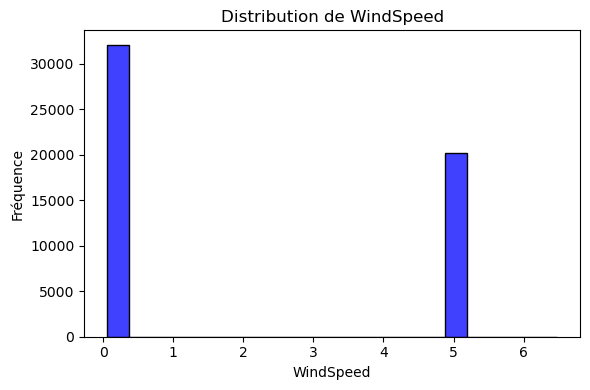

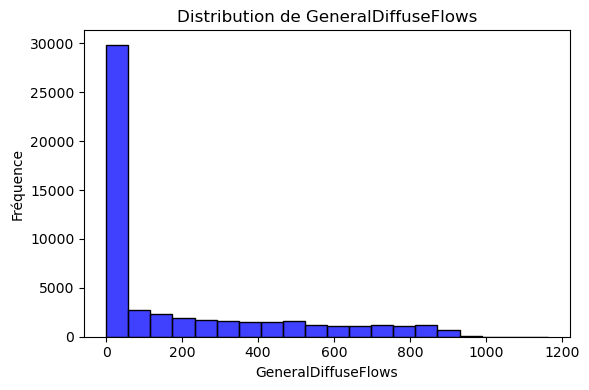

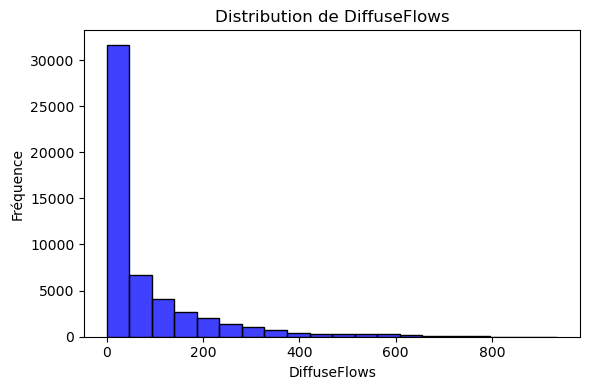

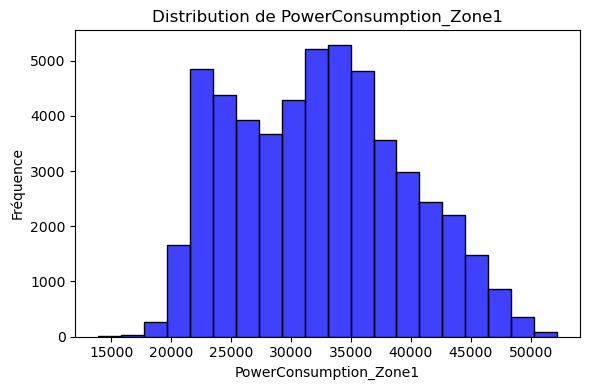

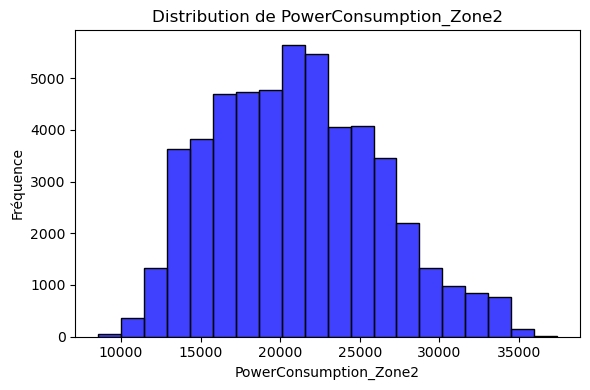

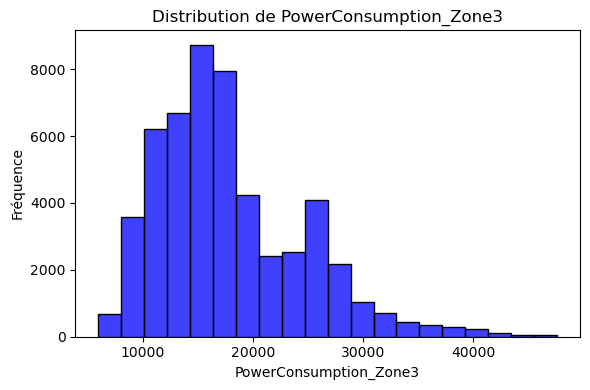

In [12]:
import os
# Chemin absolu vers le dossier cible
dossier = "C:/Users/Gaston TCHEGO/Documents/jupyter_notebooks/histogrammes"
os.makedirs(dossier, exist_ok=True)  # ✅ Crée le dossier

colonnes = [
    "Temperature", "Humidity", "WindSpeed", "GeneralDiffuseFlows",
    "DiffuseFlows", "PowerConsumption_Zone1",
    "PowerConsumption_Zone2", "PowerConsumption_Zone3"
]

for col in colonnes:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=False, bins=20, color='blue')
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.tight_layout()

    # ✅ Sauvegarde avec le chemin complet
    #chemin_fichier = os.path.join(dossier, f"histogramme_{col}.png")
    #plt.savefig(chemin_fichier, dpi=300)
    #plt.close()

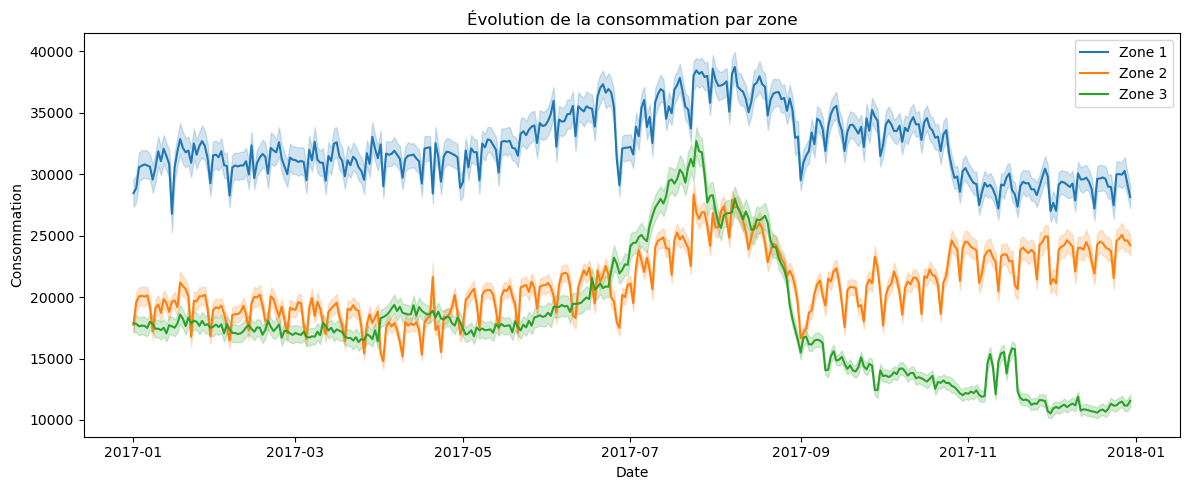

In [24]:
# Evolution comparée de la consommation des les trois zones
plt.figure(figsize=(12, 5))
sns.lineplot(x='Date', y='PowerConsumption_Zone1', data=df, label="Zone 1")
sns.lineplot(x='Date', y='PowerConsumption_Zone2', data=df, label="Zone 2")
sns.lineplot(x='Date', y='PowerConsumption_Zone3', data=df, label="Zone 3")
plt.title("Évolution de la consommation par zone")
plt.xlabel("Date")
plt.ylabel("Consommation")
plt.legend()
plt.tight_layout()
plt.savefig("evolution_consomation_par_zone.png", dpi=300, bbox_inches='tight')
plt.show()

(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, 'PowerConsumption_Zone1'),
  Text(1.5, 0, 'PowerConsumption_Zone2'),
  Text(2.5, 0, 'PowerConsumption_Zone3')])

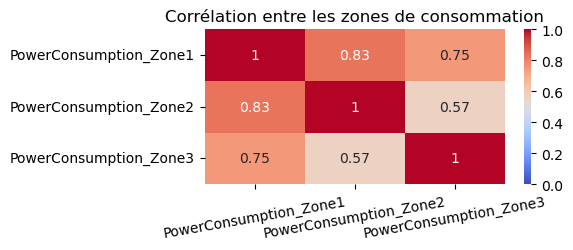

In [25]:

# La matrice de correlation de la consommation entre zones
# Extraire uniquement les colonnes des trois zones
zones = df[[
    'PowerConsumption_Zone1',
    'PowerConsumption_Zone2',
    'PowerConsumption_Zone3'
]]

# Calcul de la matrice de corrélation
corr_matrix = zones.corr()
# Tracé + sauvegarde
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Corrélation entre les zones de consommation")
plt.tight_layout()
plt.xticks(rotation=10)
#plt.savefig("heatmap_correlation_zones.png", dpi=300, bbox_inches='tight')
#plt.close()

In [27]:
# Fixation de seuuil de consommation
seuil = df['PowerConsumption_Zone1'].quantile(0.90)
df['is_peak'] = df['PowerConsumption_Zone1'] > seuil

In [28]:
df.head()

,Date,Heure,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,is_peak
0,2017-01-01,00:00:00,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,False
1,2017-01-01,00:10:00,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,False
2,2017-01-01,00:20:00,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,False
3,2017-01-01,00:30:00,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,False
4,2017-01-01,00:40:00,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,False


In [29]:
# Detecter les pics
df["is_peak"].value_counts()

is_peak
False    47174
True      5242
Name: count, dtype: int64

C:\Users\Gaston TCHEGO\AppData\Local\Temp\ipykernel_228\2392238734.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_peak', y=var, data=df, palette='Set2')


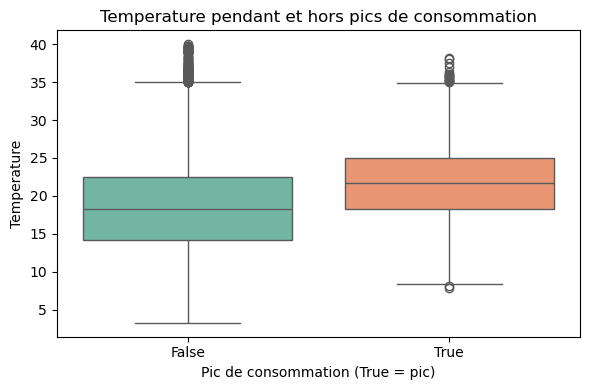

C:\Users\Gaston TCHEGO\AppData\Local\Temp\ipykernel_228\2392238734.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_peak', y=var, data=df, palette='Set2')


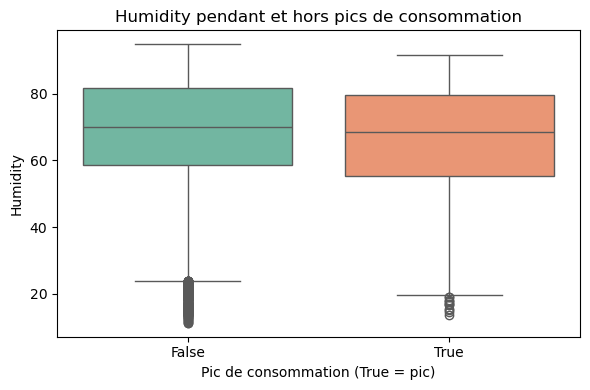

C:\Users\Gaston TCHEGO\AppData\Local\Temp\ipykernel_228\2392238734.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_peak', y=var, data=df, palette='Set2')


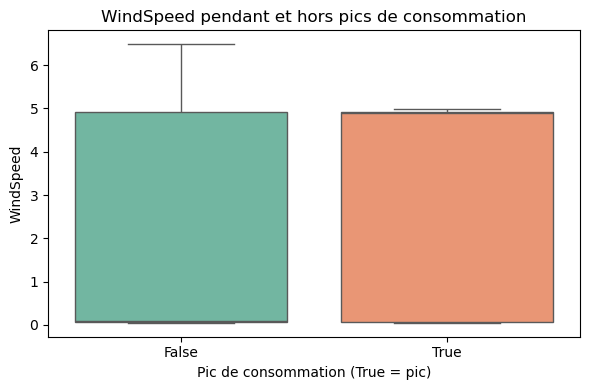

C:\Users\Gaston TCHEGO\AppData\Local\Temp\ipykernel_228\2392238734.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_peak', y=var, data=df, palette='Set2')


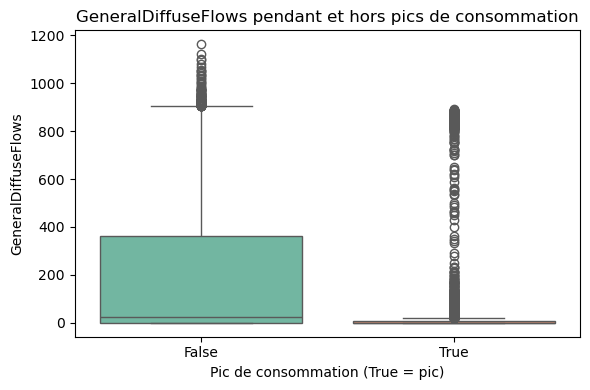

C:\Users\Gaston TCHEGO\AppData\Local\Temp\ipykernel_228\2392238734.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_peak', y=var, data=df, palette='Set2')


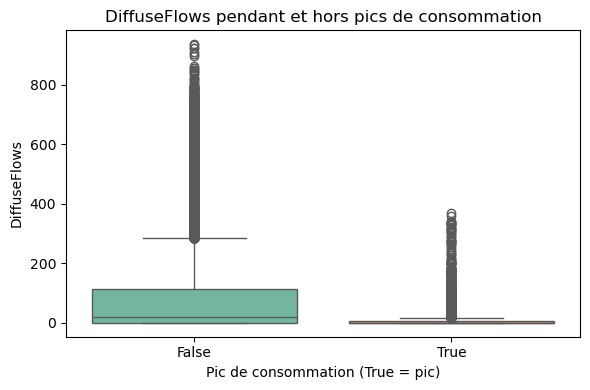

In [35]:
# tracé et sauvegarde des boxplots comparatif des variables metéorologique au moment ou non des pics
# un dossier pour sauvegarder les figures
os.makedirs("figures/boxplots_meteo_pics", exist_ok=True)

# Liste des variables météo à analyser
variables_meteo = ["Temperature", "Humidity", "WindSpeed", "GeneralDiffuseFlows", "DiffuseFlows"]
# Boucle sur les variables météo
for var in variables_meteo:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='is_peak', y=var, data=df, palette='Set2')
    plt.title(f"{var} pendant et hors pics de consommation")
    plt.xlabel("Pic de consommation (True = pic)")
    plt.ylabel(var)
    plt.tight_layout()

    #Sauvegarde du fichier
    nom_fichier = f"figures/boxplots_meteo_pics/boxplot_{var}_vs_pics.png"
    plt.savefig(nom_fichier, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
   

In [32]:
from scipy.stats import ttest_ind

# Liste des variables météo à tester
variables_meteo = ["Temperature", "Humidity", "WindSpeed", "GeneralDiffuseFlows", "DiffuseFlows"]

# Créer une liste pour stocker les résultats
resultats = []

# Boucle sur chaque variable
for var in variables_meteo:
    # Séparation des valeurs météo selon pic ou non
    valeurs_pic = df[df['is_peak']][var].dropna()
    valeurs_normales = df[~df['is_peak']][var].dropna()
    
    # Test t : moyennes indépendantes, variances inégales (Welch's t-test)
    stat, p_value = ttest_ind(valeurs_pic, valeurs_normales, equal_var=False)

    # Enregistrer les résultats
    resultats.append({
        "Variable": var,
        "Moyenne (pic)": round(valeurs_pic.mean(), 2),
        "Moyenne (normal)": round(valeurs_normales.mean(), 2),
        "p-value": p_value,
        "Significatif": "Oui" if p_value < 0.05 else "Non"
    })

# Affichage sous forme de tableau
import pandas as pd
df_resultats = pd.DataFrame(resultats)
print(df_resultats)

              Variable  Moyenne (pic)  Moyenne (normal)        p-value  \
0          Temperature          21.42             18.52  4.374915e-284   
1             Humidity          66.12             68.50   2.793965e-25   
2            WindSpeed           2.57              1.89   9.162378e-81   
3  GeneralDiffuseFlows          37.17            198.87   0.000000e+00   
4         DiffuseFlows          14.30             81.78   0.000000e+00   

  Significatif  
0          Oui  
1          Oui  
2          Oui  
3          Oui  
4          Oui  
